In [1]:
%matplotlib inline
import open_ply as op
import numpy as np

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [2]:
# read .ply mesh
pathDesktop = 'C:/Users/cdelettre/Desktop/'

subj = 'P2_F25'
path = 'E:/Celine/Ferret_ExplDTI/'+subj+'/meshInAGrid_test/'
fmesh = path+subj+'_mesh.ply'
mesh = op.open_ply(fmesh)
npt=mesh["np"];
nt=mesh["nt"];
pt=mesh["p"];
t=mesh["t"];

In [3]:
# read the set of endpoints

fendpoints = path+subj+'_endpoints.txt'
endpoints = np.loadtxt(fendpoints)

In [4]:
xmax= max(pt[:,0])
xmin= min(pt[:,0])
ymax= max(pt[:,1])
ymin= min(pt[:,1])
zmax= max(pt[:,2])
zmin= min(pt[:,2])

dx = (xmax-xmin)/2
dy = (ymax-ymin)/2
dz = (zmax-zmin)/2

xmid= xmin+dx
ymid= ymin+dy
zmid= zmin+dz

In [5]:
print xmin, xmid, xmax
print ymin, ymid, ymax
print zmin, zmid, zmax

6.086145 10.5 14.913855
2.64668 7.100001 11.553322
1.88697 5.36 8.83303


In [6]:
cube8 = np.zeros((8,6))

#d = 5

In [7]:
cube8[0] = [xmid-dx/2,ymid+dy/2,zmid+dz/2,dx,dy,dz]
cube8[1] = [xmid+dx/2,ymid+dy/2,zmid+dz/2,dx,dy,dz]
cube8[2] = [xmid+dx/2,ymid+dy/2,zmid-dz/2,dx,dy,dz]
cube8[3] = [xmid-dx/2,ymid+dy/2,zmid-dz/2,dx,dy,dz]
cube8[4] = [xmid-dx/2,ymid-dy/2,zmid-dz/2,dx,dy,dz]
cube8[5] = [xmid+dx/2,ymid-dy/2,zmid-dz/2,dx,dy,dz]
cube8[6] = [xmid+dx/2,ymid-dy/2,zmid+dz/2,dx,dy,dz]
cube8[7] = [xmid-dx/2,ymid-dy/2,zmid+dz/2,dx,dy,dz]

In [8]:
cube8

array([[  8.2930725,   9.3266615,   7.096515 ,   4.413855 ,   4.453321 ,
          3.47303  ],
       [ 12.7069275,   9.3266615,   7.096515 ,   4.413855 ,   4.453321 ,
          3.47303  ],
       [ 12.7069275,   9.3266615,   3.623485 ,   4.413855 ,   4.453321 ,
          3.47303  ],
       [  8.2930725,   9.3266615,   3.623485 ,   4.413855 ,   4.453321 ,
          3.47303  ],
       [  8.2930725,   4.8733405,   3.623485 ,   4.413855 ,   4.453321 ,
          3.47303  ],
       [ 12.7069275,   4.8733405,   3.623485 ,   4.413855 ,   4.453321 ,
          3.47303  ],
       [ 12.7069275,   4.8733405,   7.096515 ,   4.413855 ,   4.453321 ,
          3.47303  ],
       [  8.2930725,   4.8733405,   7.096515 ,   4.413855 ,   4.453321 ,
          3.47303  ]])

In [9]:
def isPointinCube(p,cube):
    cx = cube[0]
    cy = cube[1]
    cz = cube[2]
    dx = cube[3]
    dy = cube[4]
    dz = cube[5]
    
    if cx-dx/2<p[0] and p[0]<cx+dx/2 and cy-dy/2<p[1] and p[1]<cy+dy/2 and cz-dz/2<p[2] and p[2]<cz+dz/2 :
        return True
    else: 
        return False

In [10]:
endpoints.shape

(518L, 3L)

In [11]:
print isPointinCube(endpoints[10],cube8[2])

True


In [12]:
tab = np.zeros((len(endpoints),2)) #cube id, endpoint id
conMat = np.zeros((8,8))

for i in range(len(endpoints)):
    ep = endpoints[i]
    for j in range(len(cube8)):
        c = cube8[j]
        if isPointinCube(ep,c):
            #print 'ep',i,'is in cube',c[0]
            tab[i] = [j,i]
            if i%2 == 1:
                conMat[tab[i-1,0],j]+=1
                conMat[j,tab[i-1,0]]+=1
            break
        tab[i] = [-1,i] #out of cubes
            

C:\Users\cdelettre\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\cdelettre\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [13]:
#count the number of endpoints in a 
sumc =0
for x in range(8):
    sumc +=list(tab[:,0]).count(x)
    
print sumc

361


In [14]:
tab

array([[  -1.,    0.],
       [   2.,    1.],
       [   4.,    2.],
       ..., 
       [   6.,  515.],
       [   1.,  516.],
       [   1.,  517.]])

In [15]:
#right/left

conMat

array([[  6.,   3.,   4.,   5.,   0.,   0.,   0.,   5.],
       [  3.,  14.,   8.,   5.,   0.,   0.,   2.,   1.],
       [  4.,   8.,  18.,  17.,   1.,   0.,   0.,   1.],
       [  5.,   5.,  17.,  16.,   3.,   0.,   0.,   1.],
       [  0.,   0.,   1.,   3.,  14.,  15.,   8.,   9.],
       [  0.,   0.,   0.,   0.,  15.,  20.,  13.,   3.],
       [  0.,   2.,   0.,   0.,   8.,  13.,  14.,   3.],
       [  5.,   1.,   1.,   1.,   9.,   3.,   3.,   6.]])

In [16]:
#front/back

xorder = [0,3,4,7,1,2,5,6]
conMatx= conMat[:,xorder][xorder]

In [17]:
conMatx

array([[  6.,   5.,   0.,   5.,   3.,   4.,   0.,   0.],
       [  5.,  16.,   3.,   1.,   5.,  17.,   0.,   0.],
       [  0.,   3.,  14.,   9.,   0.,   1.,  15.,   8.],
       [  5.,   1.,   9.,   6.,   1.,   1.,   3.,   3.],
       [  3.,   5.,   0.,   1.,  14.,   8.,   0.,   2.],
       [  4.,  17.,   1.,   1.,   8.,  18.,   0.,   0.],
       [  0.,   0.,  15.,   3.,   0.,   0.,  20.,  13.],
       [  0.,   0.,   8.,   3.,   2.,   0.,  13.,  14.]])

In [18]:
#top/down

zorder = [2,3,4,5,0,1,6,7]
conMatz= conMat[:,zorder][zorder]

In [19]:
conMatz

array([[ 18.,  17.,   1.,   0.,   4.,   8.,   0.,   1.],
       [ 17.,  16.,   3.,   0.,   5.,   5.,   0.,   1.],
       [  1.,   3.,  14.,  15.,   0.,   0.,   8.,   9.],
       [  0.,   0.,  15.,  20.,   0.,   0.,  13.,   3.],
       [  4.,   5.,   0.,   0.,   6.,   3.,   0.,   5.],
       [  8.,   5.,   0.,   0.,   3.,  14.,   2.,   1.],
       [  0.,   0.,   8.,  13.,   0.,   2.,  14.,   3.],
       [  1.,   1.,   9.,   3.,   5.,   1.,   3.,   6.]])

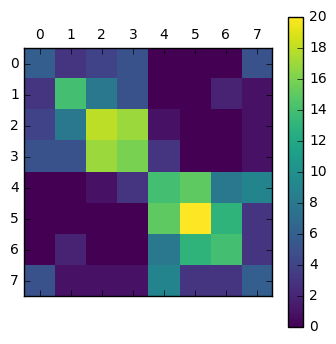

In [34]:

plt.matshow(conMat,interpolation='nearest',cmap=plt.cm.viridis)
#plt.xticks(range(8),xorder)
#plt.yticks(range(8),xorder)
plt.colorbar()
plt.show()

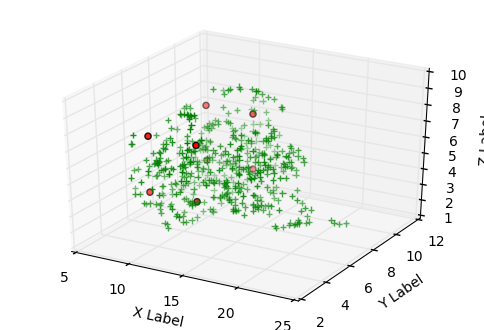

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cube8[:,0], cube8[:,1], cube8[:,2],c='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(endpoints[:,0],endpoints[:,1],endpoints[:,2],c='g',marker='+')